## Exercicio 11
Ana Moreira \
Damião Goes

In [53]:

import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [54]:

df = pd.read_csv(r'C:\Users\Damião\Desktop\Isa\Mestrado\2_semestre\Avdcaa\greends-avcad-2024\greends-avcad-2024\examples\EFIplus_medit.zip', compression='zip', sep=";")

In [55]:
missing_values = df.isnull().sum()
print(missing_values)

Site_code               0
Latitude                0
Longitude               0
Country                 0
Catchment_name          0
                       ..
Zingel asper            0
Squalius sp             0
Barbatula sp            0
Phoxinus sp             0
Iberochondrostoma_sp    0
Length: 164, dtype: int64


In [56]:
df2 = df.dropna()

In [57]:
missing_values2 = df2.isnull().sum()
print(missing_values2)

Site_code               0
Latitude                0
Longitude               0
Country                 0
Catchment_name          0
                       ..
Zingel asper            0
Squalius sp             0
Barbatula sp            0
Phoxinus sp             0
Iberochondrostoma_sp    0
Length: 164, dtype: int64


In [58]:
# Check the columns of df2
print(df2.columns)

# Print a sample of df2 to inspect the data
print(df2.head())


Index(['Site_code', 'Latitude', 'Longitude', 'Country', 'Catchment_name',
       'Galiza', 'Subsample', 'Calib_EFI_Medit', 'Calib_connect',
       'Calib_hydrol',
       ...
       'Squalius malacitanus', 'Squalius pyrenaicus', 'Squalius torgalensis',
       'Thymallus thymallus', 'Tinca tinca', 'Zingel asper', 'Squalius sp',
       'Barbatula sp', 'Phoxinus sp', 'Iberochondrostoma_sp'],
      dtype='object', length=164)
     Site_code   Latitude  Longitude Country Catchment_name  Galiza  \
18  ES_03_0001  41.957268  -2.926857   Spain          Douro       0   
19  ES_03_0002  41.850818  -2.591150   Spain          Douro       0   
28  ES_03_0012  41.498026  -5.528753   Spain          Douro       0   
32  ES_03_0016  41.586853  -3.072064   Spain          Douro       0   
43  ES_03_0029  41.830177  -3.782420   Spain          Douro       0   

    Subsample  Calib_EFI_Medit  Calib_connect  Calib_hydrol  ...  \
18          1                1              1             1  ...   
19          

#### 11.1

In [59]:
variables = ['Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul', 'Catchment_name']
basins = ['Douro', 'Tejo', 'Mondego', 'Minho']

# Ensure 'Catchment_name' is included in the filtered DataFrame
filtered_basins = df2[df2['Catchment_name'].isin(basins)][variables]

# Separate features and target
X = filtered_basins.drop(columns=['Catchment_name'])
y = filtered_basins['Catchment_name']


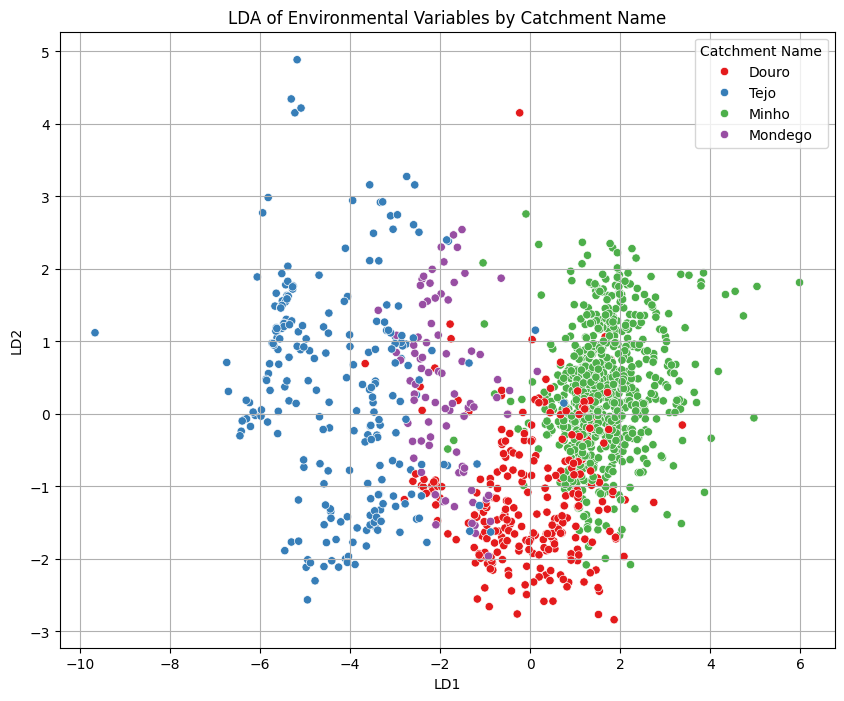

In [74]:
X_clean = X.dropna()
y_clean = y[X_clean.index]

# Perform LDA
lda = LDA(n_components=2)
X_r_clean = lda.fit(X_clean, y_clean).transform(X_clean)

# Create a DataFrame with the LDA results
lda_df = pd.DataFrame(X_r_clean, columns=['LD1', 'LD2'])
lda_df['Catchment_name'] = y.values

# Plot the LDA results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='LD1', y='LD2', hue='Catchment_name', data=lda_df, palette='Set1')
plt.title('LDA of Environmental Variables by Catchment Name')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend(title='Catchment Name')
plt.grid(True)
plt.show()

In [75]:
# Interpret LDA coefficients
coefficients = lda.scalings_
feature_names = X_clean.columns

# Create a DataFrame for better visualization
coef_df = pd.DataFrame(coefficients, index=feature_names, columns=[f'LD{i+1}' for i in range(coefficients.shape[1])])

print("\nLDA Coefficients:\n")
print(coef_df)


LDA Coefficients:

                           LD1       LD2       LD3
Altitude             -0.012471  0.001523  0.000262
Actual_river_slope   -0.007386  0.003677 -0.002716
Elevation_mean_catch -0.001408  0.004278 -0.002377
prec_ann_catch        0.001488 -0.002319 -0.003441
temp_ann             -1.647663 -0.699306 -1.832028
temp_jan             -0.790334  1.634156  0.606032
temp_jul             -0.235103 -0.386069  0.769777


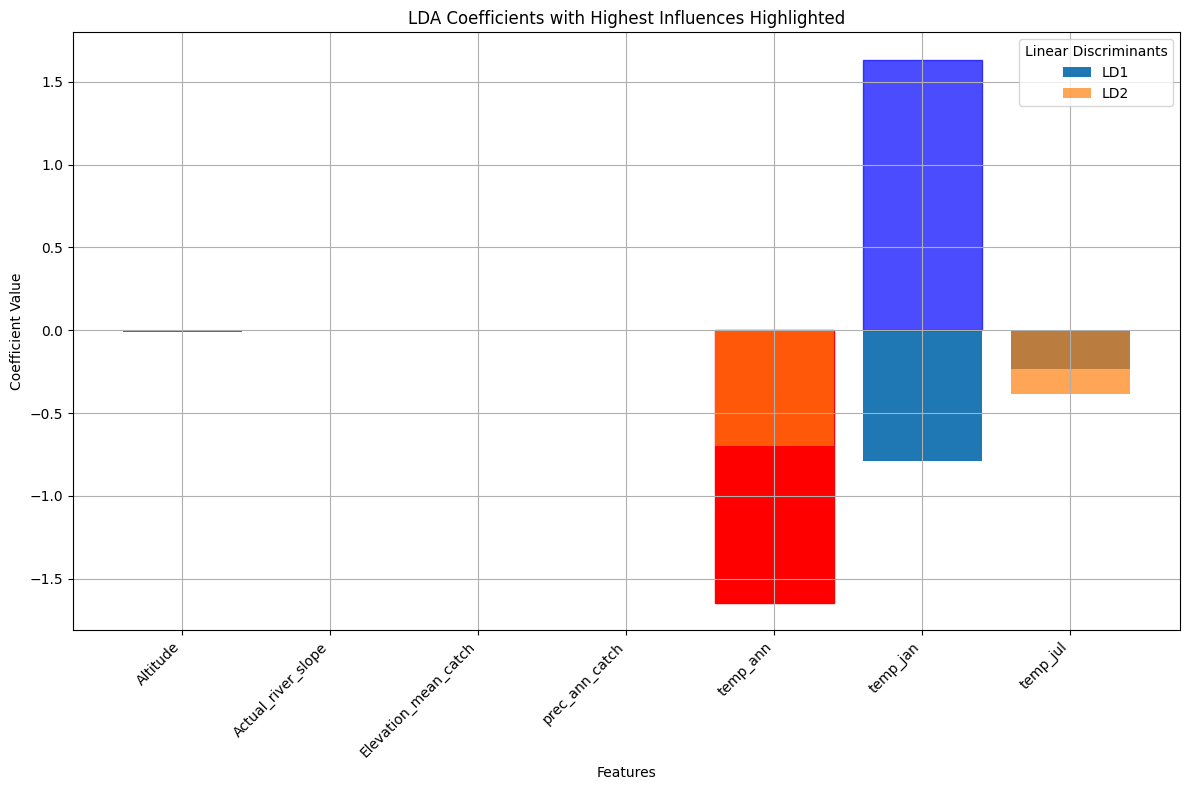

('temp_ann', 'temp_jan', -1.6476629409980543, 1.6341560497249243)

In [76]:
# Highlight the variable with the highest influence in each linear discriminant
highest_influence_LD1 = coef_df['LD1'].abs().idxmax()
highest_influence_LD2 = coef_df['LD2'].abs().idxmax()

# Plot LDA coefficients with highlights
plt.figure(figsize=(12, 8))
bars = plt.bar(coef_df.index, coef_df['LD1'], label='LD1')
bars[coef_df.index.get_loc(highest_influence_LD1)].set_color('red')
bars2 = plt.bar(coef_df.index, coef_df['LD2'], label='LD2', alpha=0.7)
bars2[coef_df.index.get_loc(highest_influence_LD2)].set_color('blue')
plt.title('LDA Coefficients with Highest Influences Highlighted')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.legend(title='Linear Discriminants')
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
highest_influence_LD1, highest_influence_LD2, coef_df.loc[highest_influence_LD1, 'LD1'], coef_df.loc[highest_influence_LD2, 'LD2']

#### 11.2

In [15]:
fig = px.scatter(lda_df, x='LD1', y='LD2', color='Catchment_name', title='LDA: Discriminant Function Space',
                 labels={'LD1': 'Linear Discriminant 1', 'LD2': 'Linear Discriminant 2'})

fig.show()



In [80]:
# Save the interactive plot to an HTML file using a raw string for the file path
html_file_path = r'C:\Users\Damião\Desktop\Isa\Mestrado\2_semestre\Avdcaa\greends-avcad-2024\greends-avcad-2024\people\Damiao_Goes\lda_plot.html'
fig.write_html(html_file_path)

# Provide the path to the saved HTML file
html_file_path


'C:\\Users\\Damião\\Desktop\\Isa\\Mestrado\\2_semestre\\Avdcaa\\greends-avcad-2024\\greends-avcad-2024\\people\\Damiao_Goes\\lda_plot.html'

##### based on the exemples given by the professor

In [14]:



fig_density_contour = px.density_contour(
    lda_df, 
    x='LD1', 
    y='LD2', 
    color='Catchment_name', 
    title='Density Contour: Discriminant Function Space',
    labels={'LD1': 'Linear Discriminant 1', 'LD2': 'Linear Discriminant 2'},
    width=1000, 
    height=600,
    marginal_y='box', 
    marginal_x='rug'
)

fig_density_contour.show()


In [17]:

fig_scatter = px.scatter(
    lda_df, 
    x='LD1', 
    y='LD2', 
    color='Catchment_name', 
    title='Scatter Plot: Discriminant Function Space',
    labels={'LD1': 'Linear Discriminant 1', 'LD2': 'Linear Discriminant 2'},
    width=1000, 
    height=600,
    size_max=45,
    marginal_y='box', 
    marginal_x='rug'
)


fig_scatter.show()
